Turkey COVID-19:

Total Confirmed: 129491
Deaths: 3520
Recovered 73285

Death/Confirmed: % 2.72
Recovered/Confirmed: % 56.59


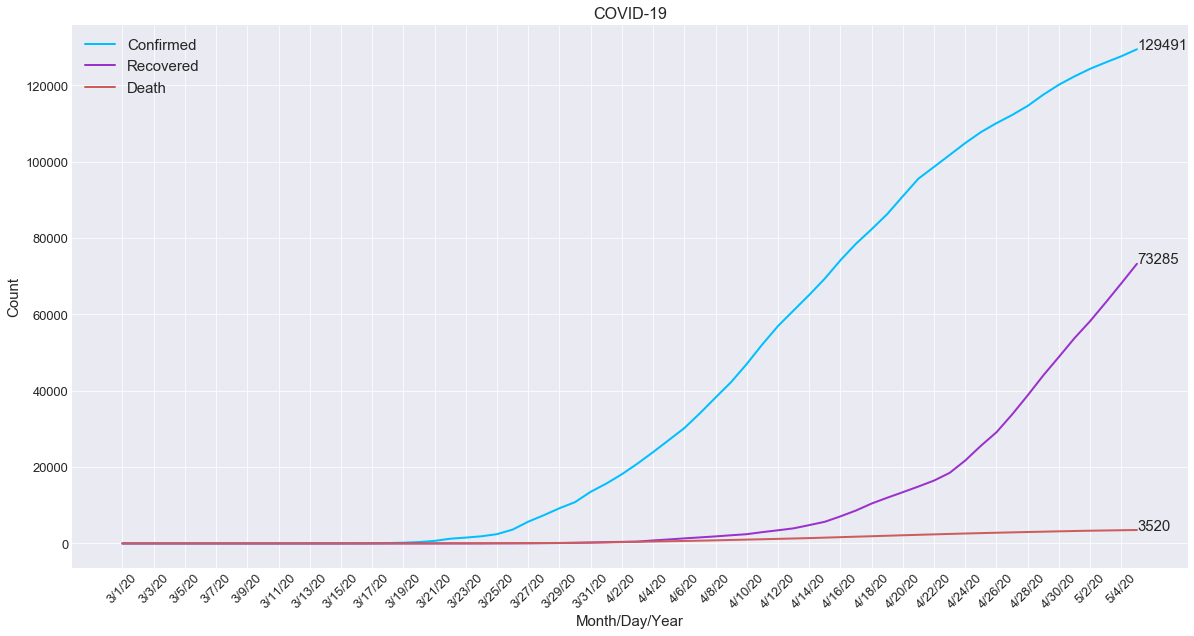

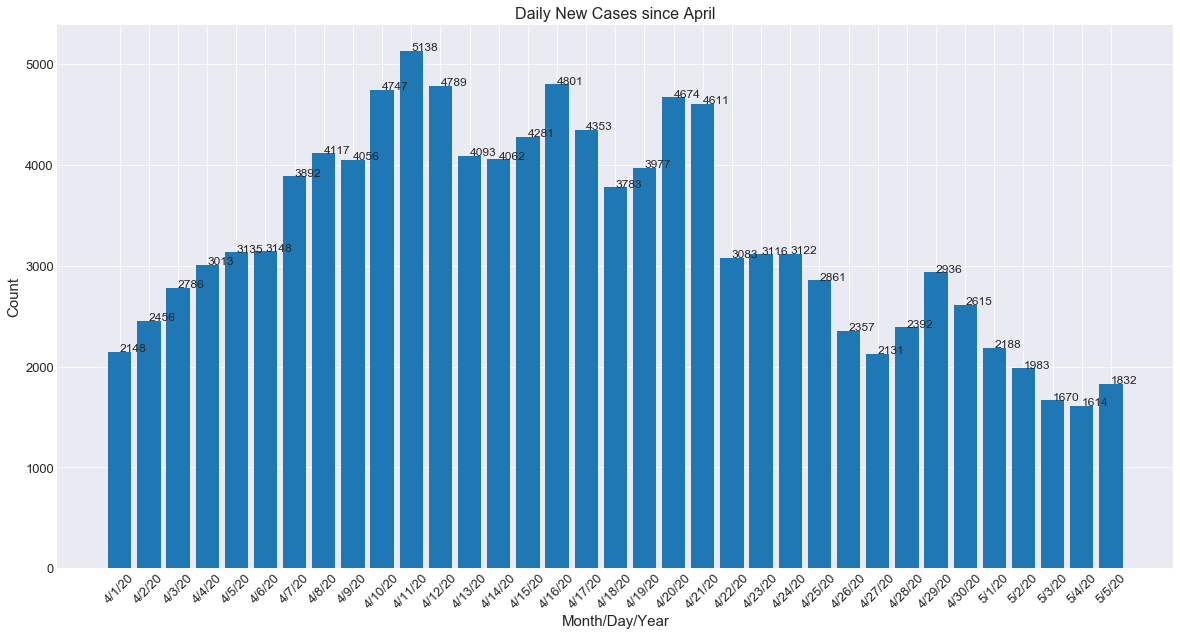

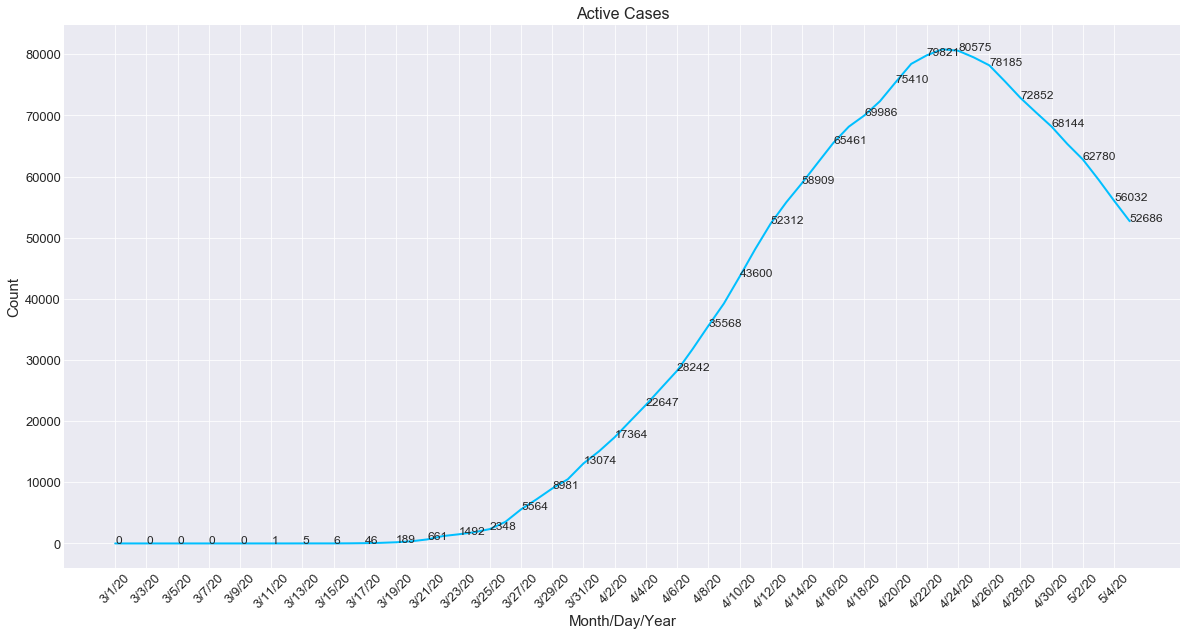

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

url_cases = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url_deaths ='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
url_recovered='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

df_cases = pd.read_csv(url_cases, error_bad_lines=False)
df_deaths = pd.read_csv(url_deaths, error_bad_lines=False)
df_recovered = pd.read_csv(url_recovered, error_bad_lines=False)

date_size=len(df_cases.columns)
country_size=len(df_cases)

#Country Selection
country ='Turkey'
c= df_cases["Country/Region"].str.find(country) 
c_loc=list(c).index(0)

c_d= df_deaths["Country/Region"].str.find(country) 
cd_loc=list(c_d).index(0)

c_r= df_recovered["Country/Region"].str.find(country) 
cr_loc=list(c_r).index(0)

recovered=df_recovered.iloc[cr_loc,4:date_size]
deaths=df_deaths.iloc[cd_loc,4:date_size]
cases=df_cases.iloc[c_loc,4:date_size]

rate_d="{:.2f}".format(round(deaths.max()*100/cases.max(), 2))
rate_r="{:.2f}".format(round(recovered.max()*100/cases.max(), 2))

print(country,"COVID-19:")
print()
print("Total Confirmed:", cases.max())
print("Deaths:", deaths.max())
print("Recovered", recovered.max())
print()
print("Death/Confirmed: %",rate_d)
print("Recovered/Confirmed: %",rate_r)

#---COVID-19---

_deaths=deaths.reset_index()
_recovered=recovered.reset_index()
_cases=cases.reset_index()

sub ='3/1/20'
march= _cases['index'].str.find(sub)
march_loc=list(march).index(0)
_cases=_cases.iloc[march_loc:]

march= _deaths['index'].str.find(sub)
march_loc=list(march).index(0)
_deaths=_deaths.iloc[march_loc:]

march= _recovered['index'].str.find(sub)
march_loc=list(march).index(0)
_recovered=_recovered.iloc[march_loc:]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.title("COVID-19",fontsize=16)
plt.text(_cases["index"].iloc[-1], _cases[c_loc].iloc[-1], _cases[c_loc].iloc[-1],fontsize=15) 
plt.text(_recovered["index"].iloc[-1], _recovered[cr_loc].iloc[-1], _recovered[cr_loc].iloc[-1],fontsize=15) 
plt.text(_deaths["index"].iloc[-1], _deaths[cd_loc].iloc[-1], _deaths[cd_loc].iloc[-1],fontsize=15)

plt.plot( _cases["index"], _cases[c_loc], marker='', color='deepskyblue', linewidth=2, label="Confirmed")
plt.plot( _recovered["index"], _recovered[cr_loc], marker='', color='darkorchid', linewidth=2, label="Recovered")
plt.plot( _deaths["index"], _deaths[cd_loc], marker='', color='indianred', linewidth=2, label="Death")
plt.xticks(_cases["index"][::2],rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Month/Day/Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.legend(loc=2,prop={'size': 15})
plt.savefig('Covid-19.jpg')
plt.show()

#---DAILY NEW CASES---

daily=cases.diff()
daily=daily.reset_index()

sub ='4/1/20'
april= daily['index'].str.find(sub) 
april_loc=list(april).index(0)
daily=daily.iloc[april_loc:]

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.bar(daily["index"],daily[c_loc]) 
plt.xlabel('Month/Day/Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title("Daily New Cases since April",fontsize=16)
for index,value in enumerate(daily[c_loc]): 
    plt.text(index, value, value,fontsize=12)
plt.xticks(rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.savefig('New_cases.jpg')
plt.show()


#---ACTIVE CASES---

active_cases = []

for i in  range(0,len(_cases)):
    case=_cases[c_loc].iloc[i]
    death=_deaths[cd_loc].iloc[i]
    recovered=_recovered[cr_loc].iloc[i]
    active=case-death-recovered
    active_cases.append(active)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(20,10))
plt.plot( _cases["index"], active_cases, marker='', color='deepskyblue', linewidth=2, label="Tanı")
plt.xticks(_cases["index"][::2],rotation=45,fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Month/Day/Year',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Active Cases',fontsize=16)
for index,value in enumerate(active_cases[::2]): 
    plt.text(index*2, value, value,fontsize=12)
plt.text(_cases["index"].iloc[-1], active_cases[-1], active_cases[-1],fontsize=12)
plt.savefig('Active_cases.jpg')
plt.show()
